In [69]:
import matplotlib.pyplot as plt
import numpy as np
import zipfile
from PIL import Image
import cv2
import os

### Path to zip folder
zip_path = "C:/Users/Sven Jacob/Downloads/Video_006.zip"

img_folder = "Video_006/Video_006/"

with zipfile.ZipFile(zip_path, 'r') as zip_file:
    file_names = zip_file.namelist()
    print(file_names)
    png_files = [f for f in file_names if f.startswith("Video_006/Video_006/Img") and f.lower().endswith(".bmp")]
    png_files = np.sort(png_files)
    #print(png_files)
    frames = []
    for png in png_files:
        with zip_file.open(png) as file:
            image_bytes = file.read()
            image_array = np.frombuffer(image_bytes, dtype=np.uint8)
            image = cv2.imdecode(image_array, cv2.IMREAD_GRAYSCALE)
            frames.append(image)

['Video_006/', 'Video_006/Video_006/', 'Video_006/Video_006.avi', 'Video_006/Video_006.xml', 'Video_006/Video_006/Img_00039.bmp', 'Video_006/Video_006/Img_00040.bmp', 'Video_006/Video_006/Img_00041.bmp', 'Video_006/Video_006/Img_00042.bmp', 'Video_006/Video_006/Img_00043.bmp', 'Video_006/Video_006/Img_00044.bmp', 'Video_006/Video_006/Img_00045.bmp', 'Video_006/Video_006/Img_00046.bmp', 'Video_006/Video_006/Img_00385.bmp', 'Video_006/Video_006/Img_00386.bmp', 'Video_006/Video_006/Img_00387.bmp', 'Video_006/Video_006/Img_00388.bmp', 'Video_006/Video_006/Img_00389.bmp', 'Video_006/Video_006/Img_00390.bmp', 'Video_006/Video_006/Img_00391.bmp', 'Video_006/Video_006/Img_00392.bmp', 'Video_006/Video_006/Img_00393.bmp', 'Video_006/Video_006/Img_00394.bmp', 'Video_006/Video_006/Img_00395.bmp', 'Video_006/Video_006/Img_00461.bmp', 'Video_006/Video_006/Img_00462.bmp', 'Video_006/Video_006/Img_00463.bmp', 'Video_006/Video_006/Img_00464.bmp', 'Video_006/Video_006/Img_00465.bmp', 'Video_006/Video_00

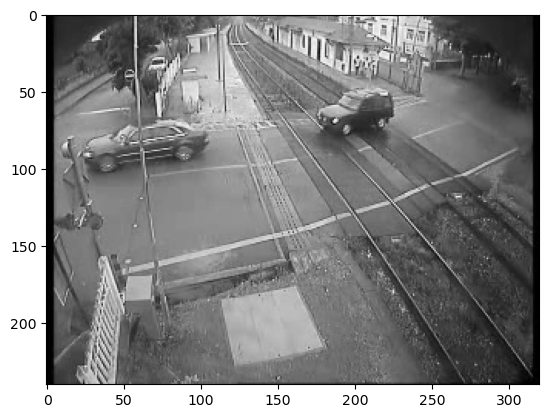

In [70]:
plt.imshow(frames[75],cmap='gray')

In [71]:
M = np.vstack([f.flatten() for f in frames])
M.shape

(86, 76800)

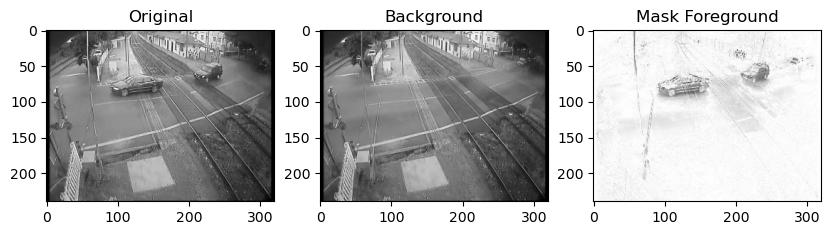

In [72]:
U,s,Vt = np.linalg.svd(M,full_matrices=False)
L=1
S_truncated = np.zeros_like(s)
S_truncated[:L] = s[:L]


frame = 70
M_background = U @ np.diag(S_truncated) @ Vt 
background_frames = M_background.reshape((-1, frames[0].shape[0],frames[0].shape[1]))
fig,ax = plt.subplots(1,3,figsize=(10,10))
ax[1].imshow(background_frames[frame],cmap='gray')
ax[1].set_title('Background')
ax[0].imshow(frames[frame],cmap='gray');
ax[0].set_title('Original')
ax[2].imshow(np.abs(frames[frame]-background_frames[frame]),cmap='binary');
ax[2].set_title('Mask Foreground');

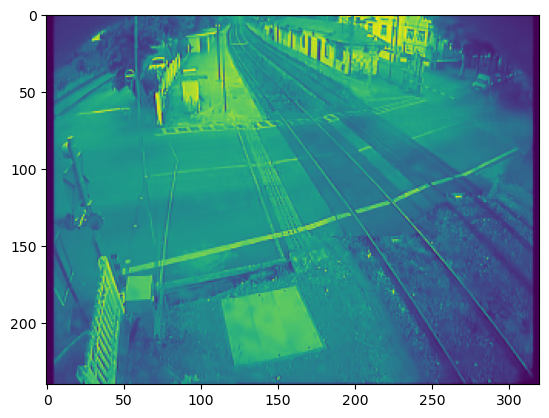

In [73]:
plt.imshow(np.mean(M,axis=0).reshape(SIZE))

## Yolo 11 no attack

In [74]:
from ultralytics import YOLO
from torchvision import transforms
import torch

# Load a pretrained YOLO11n model
model = YOLO("yolo11n.pt")

frame=1

## need to resize it such that w and h is divisible by 32 and has 3 channels
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((480,640)) # Resize to model's expected input size
])

img_tensor = transform(frames[frame]).unsqueeze(0) 

img_tensor = torch.stack((img_tensor.squeeze(0),)*3,dim=1)


# Run inference on the source
results = model(img_tensor,show=True)
cv2.waitKey(0)
cv2.destroyAllWindows() # list of Results objects


0: 480x640 1 person, 1 car, 38.5ms
Speed: 0.5ms preprocess, 38.5ms inference, 15.0ms postprocess per image at shape (1, 3, 480, 640)


In [85]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

In [102]:
from torchvision.ops import box_iou as IOU
from torchvision.ops import generalized_box_iou_loss as LossGIOU

from torchvision.ops import generalized_box_iou as GIOU


In [89]:
for result in results:
    # detection
    print(result.boxes.xyxy)  # box with xyxy format, (N, 4)
    print(result.boxes.xywh)   # box with xywh format, (N, 4)
    result.boxes.xyxyn  # box with xyxy format but normalized, (N, 4)
    result.boxes.xywhn  # box with xywh format but normalized, (N, 4)
    result.boxes.conf   # confidence score, (N, 1)
    result.boxes.cls    # cls, (N, 1)

    # classification
    result.probs   


tensor([[478.9540,  94.9607, 495.7572, 132.2569],
        [552.5367,  77.8805, 578.2719, 101.4940]], device='cuda:0')
tensor([[487.3556, 113.6088,  16.8032,  37.2962],
        [565.4043,  89.6872,  25.7351,  23.6136]], device='cuda:0')


In [ ]:
import torch 
import torch.nn as nn
from torchvision.ops import box_iou as IOU
from torch.optim import SGD

class IOU_Loss(nn.Module):
    def __init__(self):
        super(IOU_Loss,self).__init__()

    def iou_loss(self,box1, box2):
        ious = IOU(box1, box2)  # (N, M)
        max_ious, _ = torch.max(ious, dim=1) # (N,)
        loss = 1 - torch.mean(max_ious)
        return loss
    
    def forward(self,prediction,target):
        return self.iou_loss(target,prediction)
    

In [116]:
def iou_loss(box1, box2):
    """
    Calculates IoU loss between two sets of bounding boxes.

    Args:
        box1: (N, 4) tensor, where each row is [x1, y1, x2, y2].
        box2: (M, 4) tensor, where each row is [x1, y1, x2, y2].

    Returns:
        A scalar tensor representing the IoU loss.
    """
    ious = IOU(box1, box2)  # (N, M)
    # Example loss: Max IoU for each box in box1
    max_ious, _ = torch.max(ious, dim=1) # (N,)
    loss = 1 - torch.mean(max_ious) # or any other loss function you like.
    return loss

In [3]:
SIZE = frames[0].shape

In [ ]:
Delta = torch.rand(SIZE,requires_grad=True)
optimizer = SGD([Delta],lr=0.001,momentum=0.1)


epochs = 20

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((480,640)) # Resize to model's expected input size
])



for e in epochs:
    optimizer.zero_grad()
    for frame in frames:
        img_tensor = transform(frames[frame]).unsqueeze(0)
        img_tensor = torch.stack((img_tensor.squeeze(0),)*3,dim=1)

        


        


torch.Size([1, 3, 480, 640])
#########################
tensor(3047.8311, device='cuda:0', grad_fn=<AddBackward0>)
Step [1/15], Avg IoU Loss: 35.43989562988281
#########################
tensor(101.3293, device='cuda:0', grad_fn=<AddBackward0>)
Step [2/15], Avg IoU Loss: 1.1782478094100952
#########################
tensor(102.3171, device='cuda:0', grad_fn=<AddBackward0>)
Step [3/15], Avg IoU Loss: 1.1897339820861816
#########################
tensor(103.0330, device='cuda:0', grad_fn=<AddBackward0>)
Step [4/15], Avg IoU Loss: 1.1980581283569336
#########################
tensor(103.8631, device='cuda:0', grad_fn=<AddBackward0>)
Step [5/15], Avg IoU Loss: 1.2077099084854126
#########################
tensor(103.9559, device='cuda:0', grad_fn=<AddBackward0>)
Step [6/15], Avg IoU Loss: 1.2087898254394531
#########################
tensor(104.6656, device='cuda:0', grad_fn=<AddBackward0>)
Step [7/15], Avg IoU Loss: 1.217041254043579
#########################
tensor(105.2796, device='cuda:0', gr

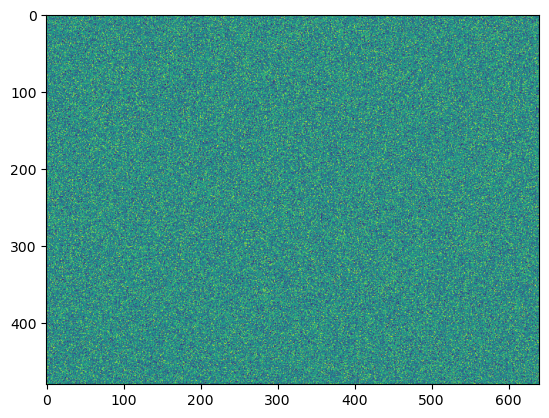

In [404]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.random
from torchvision.ops import box_iou as IOU
import torchvision.transforms as transforms

# Load YOLO model (fixed during attack)
yolo_model = YOLO("yolo11n.pt").eval()

# IoU Loss Function
class IOU_Loss(nn.Module):
    def __init__(self):
        super(IOU_Loss, self).__init__()

    def iou_loss(self, box1, box2):
        if box1.size(0) == 0 and box2.size(0) != 0:
            return torch.tensor(1.0, device=box1.device,requires_grad=True)  # Max loss (worst-case scenario)
        elif box1.size(0) == 0 and box2.size(0) == 0:
            return torch.tensor(0.0, device=box1.device,requires_grad=True)
        elif box1.size(0) != 0 and box2.size(0) == 0:
            return torch.tensor(1.0, device=box1.device,requires_grad=True)
        
        ious = IOU(box1, box2)  # (N, M)
        max_ious, _ = torch.max(ious, dim=1)  # (N,)
        loss = 1 - torch.mean(max_ious)
        return loss

    def forward(self, prediction, target):
        return self.iou_loss(prediction,target)

def nuclear_norm(x):
    return torch.mean(torch.norm(x.squeeze(0), p='nuc', dim=(1, 2)))


def frobenius_norm(x):
    return torch.mean(torch.norm(x.squeeze(0), p='fro', dim=(1, 2))**2)

def l1_norm(x):
    return torch.mean(torch.norm(x.squeeze(0), p=1, dim=(1, 2)))

YOLO_INPUT_H = 480
YOLO_INPUT_W = 640



preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((YOLO_INPUT_H,YOLO_INPUT_W))
])


epsilon = 0.1  # L-inf 0.2
num_steps = 15  # epochs
alpha = 0.01  # Step size
l1 = 100
l2 = 100

universal_perturbation = torch.rand((1, 3, YOLO_INPUT_H, YOLO_INPUT_W), device="cuda", requires_grad=True)
plt.imshow(universal_perturbation.squeeze(0).mean(axis=0).detach().cpu().numpy())
print(universal_perturbation.shape)

#optimizer = optim.SGD([universal_perturbation], lr=alpha,momentum=0.7)

optimizer = optim.Adagrad([universal_perturbation], lr=alpha)

image_list = frames 

iou_loss_fn = IOU_Loss()

# Universal Adversarial Attack (Optimize Shared Perturbation)
for step in range(num_steps):
    print("#########################")
    optimizer.zero_grad()
    total_loss = 0.0

    for image in image_list:
        # Preprocess Image
        image_tensor = preprocess(image).unsqueeze(0).to("cuda")
        image_tensor = torch.stack((image_tensor.squeeze(0),)*3,dim=1)

        
        # Add Universal Perturbation (clamp to keep it valid)
        adv_image = torch.clamp(image_tensor + universal_perturbation, 0, 1)

        with torch.no_grad():
            pred_box = yolo_model(adv_image,verbose=False)[0]
        pred_box_xyxy = pred_box.boxes.xyxy
        true_pred = yolo_model(image_tensor,verbose=False)
        target_box_xyxy = true_pred[0].boxes.xyxy


        loss = iou_loss_fn(pred_box_xyxy, target_box_xyxy)
        total_loss += loss + l1*nuclear_norm(universal_perturbation)/(YOLO_INPUT_H*YOLO_INPUT_W) + l2*frobenius_norm(universal_perturbation)/(YOLO_INPUT_H*YOLO_INPUT_W)

    # Average Loss Over All Images
    print(total_loss)
    avg_loss = total_loss / len(image_list)

    # Backpropagate to maximize loss
    (-avg_loss).backward()
    optimizer.step()

    # Ensure Perturbation is Within Allowed Range
    universal_perturbation.data = torch.clamp(universal_perturbation.data, -epsilon, epsilon)

    print(f"Step [{step+1}/{num_steps}], Avg IoU Loss: {avg_loss.item()}")


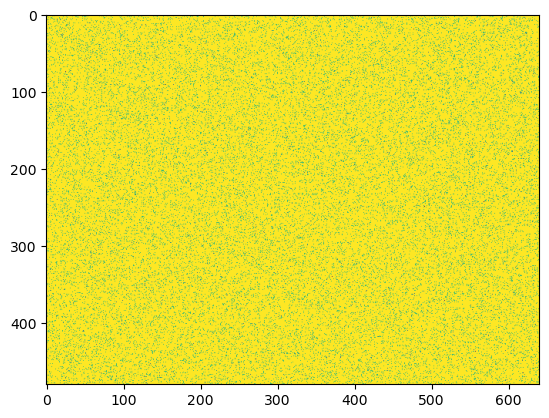

In [405]:
plt.imshow(universal_perturbation.squeeze(0).mean(axis=0).detach().cpu().numpy())

In [406]:
frame=10

## need to resize it such that w and h is divisible by 32 and has 3 channels
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((480,640)) # Resize to model's expected input size
])

img_tensor = transform(frames[frame]).unsqueeze(0) 

img_tensor = torch.stack((img_tensor.squeeze(0),)*3,dim=1)


# Run inference on the source
results = model(img_tensor,show=True)
cv2.waitKey(0)
cv2.destroyAllWindows()


0: 480x640 1 car, 1 train, 199.3ms
Speed: 1.7ms preprocess, 199.3ms inference, 30.6ms postprocess per image at shape (1, 3, 480, 640)


In [407]:
pertubed_img = torch.clamp(img_tensor+universal_perturbation.detach().cpu(),0,1)

In [408]:
results = model(pertubed_img,show=True)
cv2.waitKey(0)
cv2.destroyAllWindows()


0: 480x640 1 car, 1 bus, 106.8ms
Speed: 3.3ms preprocess, 106.8ms inference, 38.8ms postprocess per image at shape (1, 3, 480, 640)


In [271]:
pertubed_img.max()

tensor(1.0713)

## Attacks on max singular value

In [129]:
pred_box[0].boxes.xyxy

tensor([[484.6473,  95.9969, 498.8666, 132.4690],
        [552.5139,  77.8668, 578.2626, 101.5728]], device='cuda:0')

[ 3.4738e+05           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0
           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0
           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0
           0           0           0           0           0 

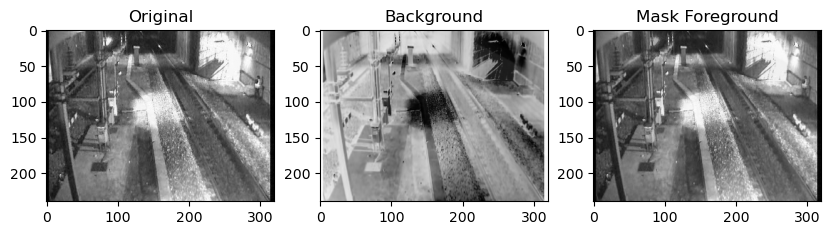

In [205]:
U,s,Vt = np.linalg.svd(M,full_matrices=False)
L=0
S_truncated = np.zeros_like(s)
S_truncated[L:L+1] = s[L:L+1]

S_truncated[0] = S_truncated[0].copy()
print(S_truncated)
U = U.copy() + np.random.uniform(0,0.2,U.shape)
#Vt = Vt.copy() + np.random.normal(0,0.001,Vt.shape)


frame = 65
M_background = U @ np.diag(S_truncated) @ Vt 
background_frames = M_background.reshape((-1, frames[0].shape[0],frames[0].shape[1]))
fig,ax = plt.subplots(1,3,figsize=(10,10))
ax[1].imshow(background_frames[frame],cmap='gray')
ax[1].set_title('Background')
ax[0].imshow(frames[frame],cmap='gray');
ax[0].set_title('Original')
ax[2].imshow(np.abs(frames[frame]-background_frames[frame]),cmap='gray');
ax[2].set_title('Mask Foreground');


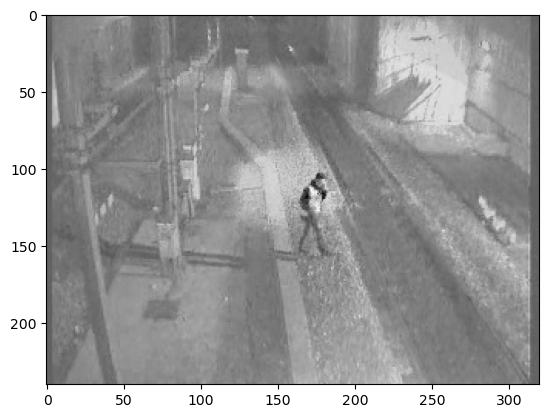

In [200]:
Attack_frame =  frames[frame] +background_frames[frame] 

plt.imshow(Attack_frame,cmap='gray')

In [206]:
Attack_frame =  frames[frame] +background_frames[frame] 


img_tensor = transform(Attack_frame).unsqueeze(0) 

img_tensor = torch.stack((img_tensor.squeeze(0),)*3,dim=1)


# Run inference on the source
results = model(img_tensor,show=True)
cv2.waitKey(0)
cv2.destroyAllWindows() # list of Results ob


WARNING  torch.Tensor inputs should be normalized 0.0-1.0 but max value is 226.18721928770606. Dividing input by 255.
0: 480x640 1 person, 188.8ms
Speed: 2.3ms preprocess, 188.8ms inference, 28.4ms postprocess per image at shape (1, 3, 480, 640)


In [4]:
from ao_exp_grad import AOExpGrad,fmin
from ao_exp_ftrl import fmin as fmin_ftrl

from ao_grad import fmin as fmin_aograd


In [5]:
from scipy.linalg import norm

In [8]:
M_normalized = (M/255)-0.5

In [9]:
def loss(X):
    l = 0
    for frame in M_normalized:
        tmp = frame.reshape(SIZE).copy()
        l+=np.linalg.norm(X-tmp)**2
    return 0.5*l/frame.shape[0] + 1*norm(X,ord='nuc') + 0.001*norm(X,ord='fro')


def loss_grad(X):
    l = 0 
    for frame in M_normalized:
        tmp = frame.reshape(SIZE).copy()
        l+=X-tmp
    return l/frame.shape[0]

320

In [10]:
def callback(res):
    print(res.func)

In [11]:
x_int = np.mean(M,axis=0).reshape(SIZE)
print(loss(x_int))
print(loss_grad(x_int))
Result = fmin(loss,loss_grad,x_int,lower=-0.5,upper=0.5,eta=1,maxfev=100,l1=150,l2=1,callback=callback,epoch_size=1)
Result

880705.5873919487
[[0.01065099 0.00690273 0.00202609 ... 0.00539823 0.00561872 0.00539823]
 [0.00709727 0.00414017 0.00354356 ... 0.00506102 0.00538526 0.00546308]
 [0.00787546 0.00731776 0.00241519 ... 0.00500914 0.0055409  0.00559278]
 ...
 [0.00273943 0.00325822 0.0036084  ... 0.00738261 0.00759012 0.00746043]
 [0.00260973 0.00362137 0.00292101 ... 0.00842019 0.00976905 0.00848504]
 [0.00259676 0.00323228 0.00320634 ... 0.00971717 0.01019705 0.01018408]]


c:\Users\Sven Jacob\Documents\Github\MatrixAdvAttacks\ao_exp_grad.py:58: RuntimeWarning: invalid value encountered in log
  x_val = np.where(abc>=15.0,np.log(abc)-np.log(np.log(abc))+np.log(np.log(abc))/np.log(abc), lambertw( np.exp(abc), k=0).real )/b-a


19.13527053093827
8.43370653168641
5.758677422503497
4.688706310580898
4.153729439994717
3.8480309707924456
3.6569703876590247
3.5295970758769144
3.440435952935493
3.3755916009108295
3.3269583927211936
3.2895482651382184
3.260154613330117
3.236639704469616
3.217533849258159
3.2017996211001374
3.1886877681280037
3.1776462104283265
3.168260888323019
3.1602163279369253
3.153268754111725
3.147227386361902
3.1419411901865653
3.1372893380199476
3.133174238391364
3.1295163723424775
3.12625042074187
3.1233223263868726
3.1206870416156867
3.118306784523776
3.1161496766332464
3.114188669541732
3.112400692555516
3.1107659707961464
3.109267475897555
3.1078904806253953
3.106622195540238
3.1054514708751313
3.104368550584597
3.1033648683852895
3.1024328777898966
3.10156590980996
3.1007580532968877
3.1000040538966003
3.099299228380648
3.0986393917365236
3.098020794890658
3.0974400713281165
3.096894191185546
3.0963804216451085
3.0958962926599636
3.095439567206631
3.095008215393468
3.0946003918644864
3.0

 success: True
       x: (array([[ 3.552e-07,  1.977e-07, ...,  8.539e-08,  7.545e-08],
                 [ 1.523e-07,  2.533e-08, ..., -1.162e-08, -2.133e-08],
                 ...,
                 [-5.651e-08, -8.275e-09, ...,  4.312e-08,  1.184e-08],
                 [-5.463e-08, -1.708e-08, ...,  8.512e-08,  6.231e-08]]), array([ 0.000e+00,  0.000e+00, ...,  0.000e+00,  0.000e+00]), array([[ 1.329e-01,  1.746e-02, ...,  2.729e-03,  3.130e-03],
                 [ 5.692e-02,  6.657e-02, ..., -3.843e-04,  3.011e-03],
                 ...,
                 [ 4.638e-02, -2.722e-02, ...,  3.084e-01, -1.446e-02],
                 [ 4.579e-02, -2.833e-02, ..., -1.202e-01, -5.827e-04]]), array([[-1.860e-01, -1.864e-01, ..., -1.829e-01, -1.828e-01],
                 [ 6.820e-02,  6.810e-02, ...,  6.611e-02,  6.614e-02],
                 ...,
                 [ 5.361e-02,  3.069e-02, ..., -2.368e-02, -1.448e-02],
                 [ 3.301e-02, -3.637e-02, ...,  2.452e-02, -3.425e-02]]))
     n

In [54]:
x_result,sigma,u,v = Result.x

In [55]:
u_res, s_res, v_res  = np.linalg.svd(x_result,full_matrices=False)

In [56]:
s_res[s_res > np.quantile(s_res,0.5)] = 0
s_res[s_res>0]=1.0

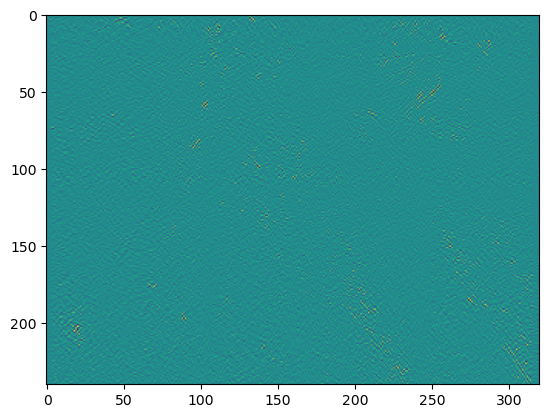

In [57]:
plt.imshow(np.matmul(u_res*s_res[..., None, :], v_res))

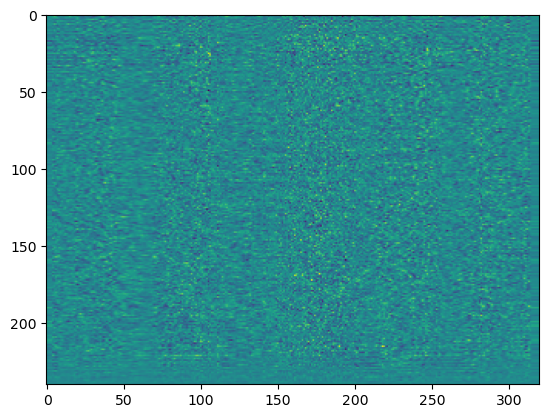

In [55]:
plt.imshow(np.sum([np.matmul(u[i,:][:,np.newaxis],v[i,:][:,np.newaxis].T) for i in range(110)],axis=0))

u 240x240
v 

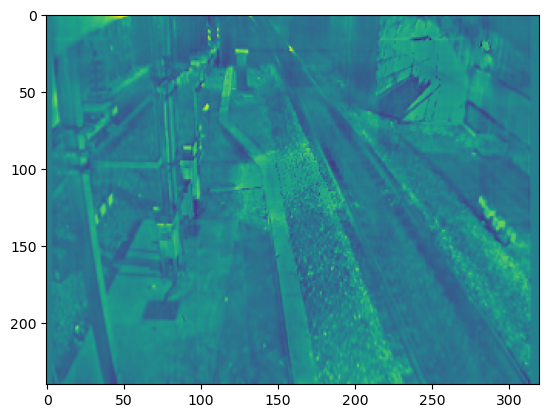

In [61]:
plt.imshow(x_result)

In [ ]:
np.outer()

(240, 320)

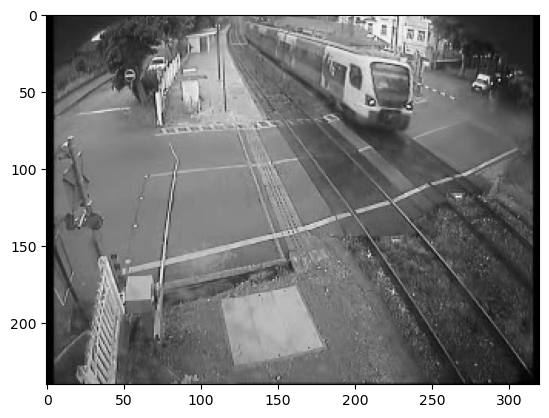

In [170]:
plt.imshow(frames[10],cmap='gray')

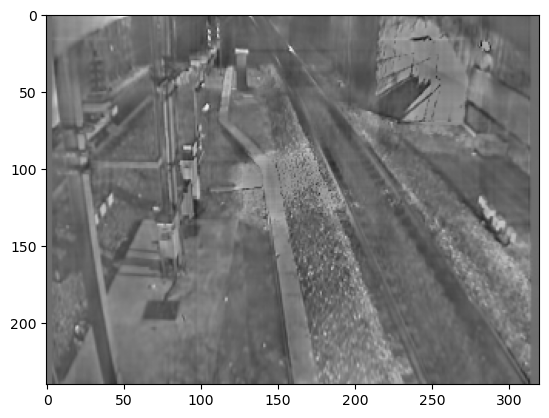

In [18]:
plt.imshow(sigma,cmap='gray')

In [12]:
Result.x

(array([[ 3.55239173e-07,  1.97745869e-07, -3.48479614e-08, ...,
          7.33908495e-08,  8.53860605e-08,  7.54548961e-08],
        [ 1.52316180e-07,  2.53270957e-08, -1.64912896e-08, ...,
         -2.78720398e-08, -1.16215495e-08, -2.13281289e-08],
        [ 1.68207287e-07,  1.58399124e-07, -4.74216986e-08, ...,
         -2.10932469e-08,  7.51725574e-09, -1.56969826e-10],
        ...,
        [-4.76438679e-08, -1.68302212e-08, -8.88233885e-09, ...,
         -4.61788872e-08, -2.64866128e-08, -3.85332683e-08],
        [-5.65054542e-08, -8.27542487e-09, -3.02556326e-08, ...,
          2.03304214e-08,  4.31204796e-08,  1.18387458e-08],
        [-5.46322274e-08, -1.70761757e-08, -3.07075667e-08, ...,
          5.40415802e-08,  8.51218044e-08,  6.23142028e-08]]),
 array([[ 0.13285914,  0.01745845,  0.00375182, ...,  0.0046886 ,
          0.00272907,  0.00312993],
        [ 0.05691986,  0.0665729 ,  0.01107839, ...,  0.00850688,
         -0.00038433,  0.00301134],
        [ 0.06504919,  0.

In [ ]:
np.linalg.svd(Result.x,full_matrices=False)

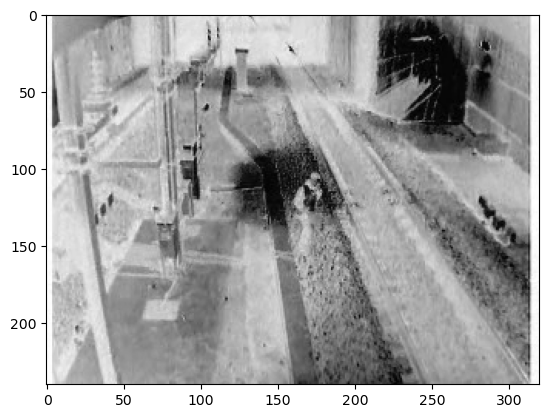

In [208]:
plt.imshow(frames[0]-Result.x,cmap='binary')

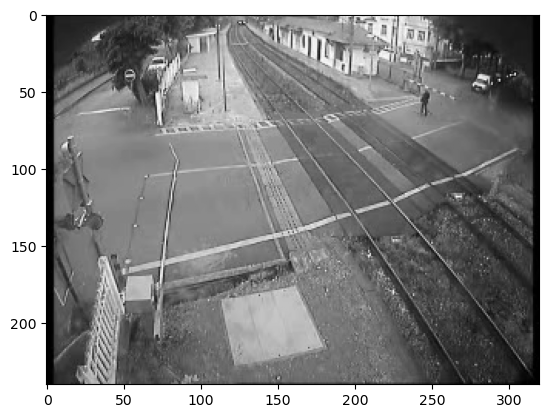

In [185]:
plt.imshow((Result.x-frames[0]),cmap='binary')

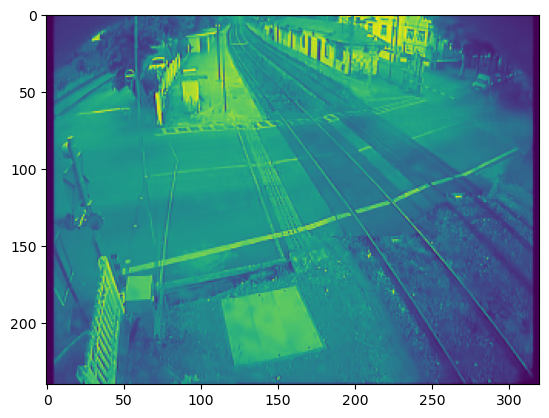

In [155]:
plt.imshow(M.mean(axis=0).reshape(SIZE))

In [44]:
Result.x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])